Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Importing and loading Dataset 

In [89]:
fine_labels = pd.read_csv("fine_labels.csv")
train_Image = np.load('trnImage.npy')
test_Image = np.load('tstImage.npy')
train_Label = np.load('trnLabel_fine.npy')
test_Label = np.load('tstLabel_fine.npy')

train_Image=train_Image.transpose((3,0,1,2))
test_Image=test_Image.transpose((3,0,1,2))

Preprocess and reshaping data

In [107]:
print("Train Image:",train_Image.shape)
print("Train Label:",train_Label.shape)

print("Test Image:",test_Image.shape)
print("Test Label:",test_Label.shape)

Train Image: (50000, 32, 32, 3)
Train Label: (50000,)
Test Image: (10000, 32, 32, 3)
Test Label: (10000,)


Building CNN

In [91]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_Image, train_Label, epochs=10, batch_size=32, validation_data=(test_Image, test_Label))


Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 3.6773 - accuracy: 0.1464 - val_loss: 3.1983 - val_accuracy: 0.2269
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.9885 - accuracy: 0.2673 - val_loss: 2.9205 - val_accuracy: 0.2802
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6856 - accuracy: 0.3278 - val_loss: 2.6990 - val_accuracy: 0.3257
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.4798 - accuracy: 0.3675 - val_loss: 2.5995 - val_accuracy: 0.3489
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3271 - accuracy: 0.4014 - val_loss: 2.5670 - val_accuracy: 0.3552
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 2.1968 - accuracy: 0.4271 - val_loss: 2.5357 - val_accuracy: 0.3639
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0870 - accuracy: 0.4531 - val_loss: 2.5228 -

Evaluating Model

In [92]:
predictions = model.predict(test_Image)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_Label

313/313 [==============================] - 1s 4ms/step


Confusion Matrix

Confusion Matrix:
 [[71  2  0 ...  0  1  0]
 [ 1 46  1 ...  0  0  0]
 [ 4  0 20 ...  0  5  0]
 ...
 [ 0  0  0 ... 36  0  1]
 [ 2  0  4 ...  0 11  0]
 [ 0  0  2 ...  0  0 21]]
2


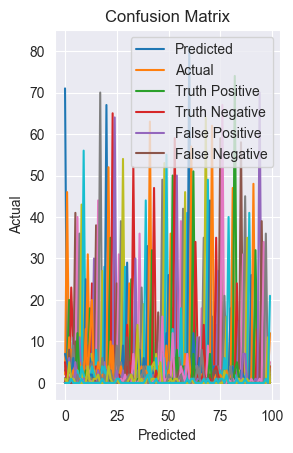

In [108]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

print(conf_matrix.ndim)

plt.subplot(122)
plt.plot(conf_matrix)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend(['Predicted',
            'Actual','Truth Positive', 'Truth Negative', 'False Positive', 'False Negative'])
plt.title('Confusion Matrix')
plt.show()

Data accuracy

In [104]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy*100,"%")

Accuracy: 37.43 %
